# Apuntes de Spark del libro

Aquí detallaré todo lo aprendido del libro para que me sea útil a la hora de recordar la teoría de Spark.


# Capítulo 1: Introducción a Spark

Para empezar definiremos qué es Apache Spark:
Apache Spark es una herramienta unificada diseñada para realizar procesos paralelos teniendo muy en cuenta 
la eficacia y rapidez de sus procesos. 
Tiene muchas ventajas:

1. Es muy rápido y esta optimizado.
2. Fácil de usar
3. Muy flexible y compatible con otros entornos y lenguajes de programación. 
4. No es necesario aprender individualmente las APIs de Spark, todo está unificado.
5. Tolerancia a fallo, en el momento que un nodo falla, otro nodo asumirá el cargo y no es necesario reiniciar la ejecución.



## Funcionamiento de Apache Spark

Spark distribuye todos los datos de varias formas para optimizar y paralelizar el procesamiento de los datos.
Todos los datos, son distribuidos en un clúster con una estructura jerárquica:

1. El núcleo más importante es el Driver, ya que es el encargado de organizar las operaciones pararelas en el clúster.
Es el que se encarga de comunicarse con las otras partes del clúster y mandar trabajo, con una Spark Session.

2. El cluster Manager, es el responsable de manegar y distribuir los recursos del clúster a los nodos.

3. Spark executor son como los nodos exclavos del clúster, se encargan de ejecutar los trabajos impartidos por el Driver.

4. Gracias a la flexibilidad de SPark, se puede iniciar Apache Spark en diferentes entornos y aprovechando al máximo las capacidades.
Esto se debe a que el clúster manager es adaptable al entorno. Puede ser iniciado en local, standalone, YARN o incluso en Kubernetes.

5. Los datos almacenados en Spark se pueden particionar para realizar el paralelismo de mejor forma.

Una de las importancias y ventajas que tiene Spark a la otra de la ejecución de un programa, es que el programador únicamente expresa
qué quieres ejecutar en la herramienta, y Apache Spark se encarga de optimizar y organizar la forma de ejecutar dicho trabajo.
Esto se debe al Cataclyst que viene incorporado en Apache Spark y de esta forma, el programador no se tiene que preocupar de cómo gestionar
y organizar el programa para que sea más limpio y eficiente.



In [ ]:
#In python
from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [23]:
//In scala 
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql.Row


import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql.Row


# M&Ms for the Cookie Monster 

### Python Version

In [ ]:
from __future__ import print_function

import sys

from pyspark.sql import SparkSession
from pyspark.sql import functions

if __name__ == "__main__":
    
    spark = (SparkSession
        .builder
        .appName("PythonMnMCount")
        .getOrCreate())
    # get the M&M data set file name
    mnm_file = "mnm_dataset.csv"
    # read the file into a Spark DataFrame
    mnm_df = (spark.read.format("csv")
        .option("header", "true")
        .option("inferSchema", "true")
        .load(mnm_file))
    mnm_df.show(n=5, truncate=False)

    # aggregate count of all colors and groupBy state and color
    # orderBy descending order
    count_mnm_df = (mnm_df.select("State", "Color", "Count")
                    .groupBy("State", "Color")
                    .sum("Count")
                    .orderBy("sum(Count)", ascending=False))
    
    # show all the resulting aggregation for all the dates and colors
    count_mnm_df.show(n=60, truncate=False)
    print("Total Rows = %d" % (count_mnm_df.count()))

    # find the aggregate count for California by filtering
    ca_count_mnm_df = (mnm_df.select("*")
                       .where(mnm_df.State == 'CA')
                       .groupBy("State", "Color")
                       .sum("Count")
                       .orderBy("sum(Count)", ascending=False))

    # show the resulting aggregation for California
    ca_count_mnm_df.show(n=10, truncate=False)

In [ ]:
from pyspark.sql import functions as F
calculos_mnm= (mnm_df
              .select("Count","State","Color")
              .groupBy("State","Color")
              .agg(F.min("Count"),F.max("Count"), F.avg("Count"), F.count("Count"))
              .orderBy("State", "Color"))

calculos_mnm.show(n=20, truncate=False)

### Scala Version

In [ ]:
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions._

    val spark = SparkSession
      .builder
      .appName("MnMCount")
      .getOrCreate()
    val mnmFile = "mnm_dataset.csv"
    // read the file into a Spark DataFrame
    val mnmDF = spark.read.format("csv")
      .option("header", "true")
      .option("inferSchema", "true")
      .load(mnmFile)
    // display DataFrame
    mnmDF.show(5, false)

    // aggregate count of all colors and groupBy state and color
    // orderBy descending order
    val countMnMDF = mnmDF.select("State", "Color", "Count")
        .groupBy("State", "Color")
        .sum("Count")
        .orderBy(desc("sum(Count)"))

    // show all the resulting aggregation for all the dates and colors
    countMnMDF.show(60)
    println(s"Total Rows = ${countMnMDF.count()}")
    println()

    // find the aggregate count for California by filtering
    val caCountMnNDF = mnmDF.select("*")
      .where(col("State") === "CA")
      .groupBy("State", "Color")
      .sum("Count")
      .orderBy(desc("sum(Count)"))

    // show the resulting aggregation for California
    caCountMnNDF.show(10)

### Ejecicios externos Capítulo 2

In [ ]:
//A | El Quijote

val url = "el_quijote.txt"
    // read the file into a Spark DataFrame
val quijote = spark.read.text(url)
// display DataFrame

In [ ]:
//quijote.show(5, false)
//quijote.count()
//quijote.take(5)
//quijote.show(5)
//quijote.head()
quijote.first()
//https://stackoverflow.com/questions/45138742/apache-spark-dataset-api-headnint-vs-takenint
//first recoge el primer elemeto, take recoge la matriz que contiene el primer elemento
//Sin embargo, todas las funciones son prácticamente iguales, pero la API da diferentes opciones agusto del programador

In [ ]:
//B
//1
val ej1 = mnmDF
 .select("State", "Color", "Count")
 .groupBy("State", "Color")
 .agg(max("Count").alias("Maximo"))
 .orderBy(col("State").desc, col("Color").desc)
ej1.show()

In [ ]:
//2
val ej2 = mnmDF
 .select("State", "Color", "Count")
 .where("State in ('CA', 'NV', 'TX', 'CO')")
 .groupBy("State", "Color")
 .agg(sum("Count").alias("Total"))
 .orderBy("State", "Color")
ej2.show(24,false)

In [ ]:
//3
val calculos_mnm= mnmDF
              .select("Count","State","Color")
              .groupBy("State","Color")
              .agg(min("Count").alias("Minimo"), max("Count").alias("Maximo"), avg("Count").alias("Media"), count("Count").alias("Count"))
              .orderBy("State", "Color")
calculos_mnm.count()

In [ ]:
//4
calculos_mnm.createOrReplaceTempView("info")
spark.table("info").show()

# Capítulo 3: La estructura de las APIs de Apache Spark

En este capítulo aprenderemos cómo se construyeron las estructuras y las funciones dentro de las APIs de Apache Spark y por qué se unificaron y hubo tantos cambios en las versiones 2.x.x

En las versiones antiguas de Spark 1.x.x, cuando creábamos RDDs para realizar operaciones con datos, Spark era incapaz de traducir y comprender las expresiones de los RDDs por lo que era imposible optimizar el cómputo de ellas. 
Por lo que en versiones 2.x.x, daba la disponibilidad de utilizar expresiones computacionales comunes con patrones simples para el análisis de datos, como por ejemplo selects, counts, groups, etc. De esta forma, Spark reconocerá las expresiones y podrá optimizar el cómputo.
Aparte de ello, también introduce un esquema  para organizar y estructurizar los datos en forma de tablas SQL para mejorar el rendimiento, eficacia, y mejorar el aspecto de los datos siendo más simples y comunes a todos los lenguajes:
Vamos a probar un código en python con RDDs antiguas.

Esto se debe a que RDDs trabaja más a nivel bajo por ello SPark no sabrá como optimizar lo ya que RDDs trabajan 

In [ ]:
# In Python
# Create an RDD of tuples (name, age)
dataRDD = sc.parallelize([("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35), ("Brooke", 25)])
# Use map and reduceByKey transformations with their lambda 
# expressions to aggregate and then compute average
agesRDD = dataRDD.map(lambda x: (x[0], (x[1], 1))).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))

agesRDD.collect()

In [ ]:
# In Python 
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
# Create a DataFrame using SparkSession
spark = (SparkSession
 .builder
 .appName("AuthorsAges")
 .getOrCreate())
# Create a DataFrame 
data_df = spark.createDataFrame([("Brooke", 20), ("Denny", 31), ("Jules", 30),("TD", 35), ("Brooke", 25)], ["name", "age"])
# Group the same names together, aggregate their ages, and compute an average
avg_df = data_df.groupBy("name").agg(avg("age"))
# Show the results of the final execution
avg_df.show()

Como se puede observar, cuando creas un RDD, creas las transformaciones necesarias y Spark no sabrá la expresión computacional que conllevará, únicamente lo hará sin optimizar el procedimiento. Sin embargo, usando funciones de la API con la versión 2.x.x, Spark puede leer y entender el funcionamiento y el resultado que quieres obtener, optimizando todo lo posible a nivel computacional.

### Dataframe API

Las declaraciones de dataframes en Spark están inspirados de pandas.
El formato de las tablas son tipados, con filas y columnas. También se trabaja en memoria y los datos son distribuidos.
También hay que tener en cuenta que se pueden generar dataframes a partir de otros dataframes transformándolos y modificando su contenido.
Es posible recuperar todos los dataframes en el proceso, cosa que es una gran ventaja respecto a otros frameworks.
La API de dataframe de Apache Spark, admite varios tipos de variables:

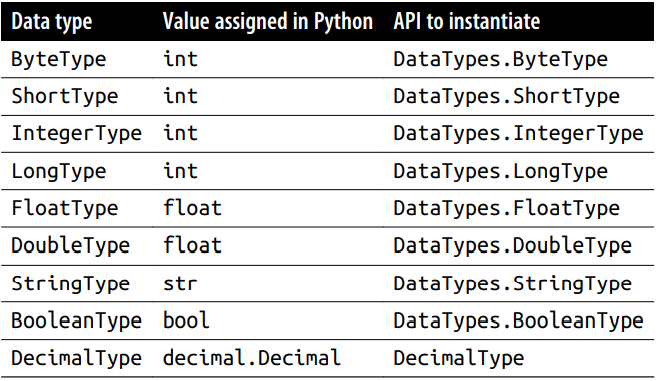

Squema relaciona los tipos de datos con las columnas de un dataframe. El libro recomienda que siempre definamos a priori un squema ya que brinda muchas ventajas, como por ejemplo, detectar errores al inicio del proceso y ahorrar a Spark cómputo innecesario creando un job extra para leer y los datos del dataframe.

### Creación de squemas

In [ ]:
// In Scala
import org.apache.spark.sql.types._
val schema = StructType(Array(StructField("author", StringType, false),
 StructField("title", StringType, false),
 StructField("pages", IntegerType, false)))

// In Scala using DDL
val schema = "author STRING, title STRING, pages INT"



In [ ]:
# In Python
from pyspark.sql.types import *
schema = StructType([StructField("author", StringType(), False),
 StructField("title", StringType(), False),
 StructField("pages", IntegerType(), False)])

# In Python with DDL
schema = "author STRING, title STRING, pages INT"

In [ ]:
//In Scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types._
object scalaDataframe {
def main(args: Array[String]) {
 val spark = SparkSession
 .builder
 .appName("scalaDataframe")
 .getOrCreate()
 // Get the path to the JSON file
 val jsonFile = "blogs.json"
 // Define our schema programmatically
    
 val schema = StructType(Array(StructField("Id", IntegerType, false),
 StructField("First", StringType, false),
 StructField("Last", StringType, false),
 StructField("Url", StringType, false),
 StructField("Published", StringType, false),
 StructField("Hits", IntegerType, false),
 StructField("Campaigns", ArrayType(StringType), false)))
    
 // Create a DataFrame by reading from the JSON file 
 // with a predefined schema
 val blogsDF = spark.read.schema(schema).json(jsonFile)
 // Show the DataFrame schema as output
 blogsDF.show(false)
// Print the schema
 println(blogsDF.printSchema)
 println(blogsDF.schema)
 println(blogsDF)
}
}

scalaDataframe.main(Array())

In [ ]:
# In Python 
from pyspark.sql import SparkSession
# Define schema for our data using DDL 
schema = "Id INT, First STRING, Last STRING, Url STRING, Published STRING, Hits INT, Campaigns ARRAY<STRING>"
# Create our static data
data = [[1, "Jules", "Damji", "https://tinyurl.1", "1/4/2016", 4535, ["twitter","LinkedIn"]],
 [2, "Brooke","Wenig", "https://tinyurl.2", "5/5/2018", 8908, ["twitter","LinkedIn"]],
 [3, "Denny", "Lee", "https://tinyurl.3", "6/7/2019", 7659, ["web","twitter", "FB", "LinkedIn"]],
 [4, "Tathagata", "Das", "https://tinyurl.4", "5/12/2018", 10568, ["twitter", "FB"]],
 [5, "Matei","Zaharia", "https://tinyurl.5", "5/14/2014", 40578, ["web","twitter", "FB", "LinkedIn"]],
 [6, "Reynold", "Xin", "https://tinyurl.6", "3/2/2015", 25568,["twitter", "LinkedIn"]]]

 # Create a SparkSession
spark = (SparkSession
 .builder
 .appName("MyFirstDataframe")
 .getOrCreate())
 # Create a DataFrame using the schema defined above
blogs_df = spark.createDataFrame(data, schema)
 # Show the DataFrame; it should reflect our table above
blogs_df.show()
 # Print the schema used by Spark to process the DataFrame
print(blogs_df.printSchema())


In [ ]:
//In Scala
import org.apache.spark.sql.functions._
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types._
 val spark = SparkSession
 .builder
 .appName("scalaDataframe")
 .getOrCreate()
 // Get the path to the JSON file
 val jsonFile = "blogs.json"
 // Define our schema programmatically
    
 val schema = StructType(Array(StructField("Id", IntegerType, false),
 StructField("First", StringType, false),
 StructField("Last", StringType, false),
 StructField("Url", StringType, false),
 StructField("Published", StringType, false),
 StructField("Hits", IntegerType, false),
 StructField("Campaigns", ArrayType(StringType), false)))
    
 // Create a DataFrame by reading from the JSON file 
 // with a predefined schema
 val blogsDF = spark.read.schema(schema).json(jsonFile)
 // Show the DataFrame schema as output
 blogsDF.show(false)
// Print the schema
 println(blogsDF.printSchema)
 println(blogsDF.schema)


In [ ]:
//In Scala
blogsDF.columns
// Access a particular column with col and it returns a Column type
blogsDF.col("Id")
// Use an expression to compute a value
blogsDF.select(expr("Hits * 2")).show(2)
// or use col to compute value
blogsDF.select(col("Hits") * 2).show(2)

blogsDF.withColumn("Big Hitters", (expr("Hits > 10000"))).show()

// Concatenate three columns, create a new column, and show the
// newly created concatenated column
blogsDF
 .withColumn("AuthorsId", (concat(expr("First"), expr("Last"), expr("Id"))))
 .select(col("AuthorsId"))
 .show(4)

// These statements return the same value, showing that
// expr is the same as a col method call
blogsDF.select(expr("Hits")).show(2)
blogsDF.select(col("Hits")).show(2)
blogsDF.select("Hits").show(2)

// Sort by column "Id" in descending order
blogsDF.sort(col("Id").desc).show()
blogsDF.sort($"Id".desc).show()


In [ ]:
#In Python
from pyspark.sql.functions import *

blogs_df.columns

blogs_df.columns[0]
# Use an expression to compute a value
blogs_df.select(expr("Hits * 2")).show(2)
# or use col to compute value

blogs_df.withColumn("Big Hitters", (expr("Hits > 10000"))).show()

# Concatenate three columns, create a new column, and show the
# newly created concatenated column
blogs_df.withColumn("AuthorsId", (concat(expr("First"), expr("Last"), expr("Id")))).select(col("AuthorsId")).show(4)

# These statements return the same value, showing that
# expr is the same as a col method call
blogs_df.select(expr("Hits")).show(2)
blogs_df.select(col("Hits")).show(2)
blogs_df.select("Hits").show(2)

# Sort by column "Id" in descending order
blogs_df.sort(desc("Id")).show()

In [ ]:
// In Scala
import org.apache.spark.sql.Row
// Create a Row
val blogRow = Row(6, "Reynold", "Xin", "https://tinyurl.6", 255568, "3/2/2015", Array("twitter", "LinkedIn"))
// Access using index for individual items
blogRow(1)
//Create a dataframe with some rows
val rows = Seq(("Matei Zaharia", "CA"), ("Reynold Xin", "CA"))
val authorsDF = rows.toDF("Author", "State")
authorsDF.show()


In [ ]:
# In Python
from pyspark.sql import Row
blog_row = Row(6, "Reynold", "Xin", "https://tinyurl.6", 255568, "3/2/2015",
 ["twitter", "LinkedIn"])
# access using index for individual items
blog_row[1]

rows = [Row("Matei Zaharia", "CA"), Row("Reynold Xin", "CA")]
authors_df = spark.createDataFrame(rows, ["Authors", "State"])
authors_df.show()


### DataFrameReady & DataFrameWriter

Existen dos interfaces en Apache Spark para leer y escribir datos en un dataframe a partir de un origen que puede ser CSV, JSON, TXT, Avro, ORC, etc.
Lo que hemos estado haciendo durante los ejercicios en realidad es leer entero un csv y transferirlo a un dataframe. Con estas interfaces se podrán realizar iteraciones.

In [1]:
// In Scala it would be similar
import org.apache.spark.sql.types._

val fireSchema = StructType(Array(StructField("UnitID", StringType, true),
 StructField("IncidentNumber", IntegerType, true),
 StructField("CallType", StringType, true), 
 StructField("CallDate", StringType, true), 
 StructField("WatchDate", StringType, true),
 StructField("CallFinalDisposition", StringType, true),
 StructField("AvailableDtTm", StringType, true),
 StructField("Address", StringType, true), 
 StructField("City", StringType, true), 
 StructField("Zipcode", IntegerType, true), 
 StructField("Battalion", StringType, true), 
 StructField("StationArea", StringType, true), 
 StructField("Box", StringType, true), 
 StructField("OriginalPriority", StringType, true), 
 StructField("Priority", StringType, true), 
 StructField("FinalPriority", IntegerType, true), 
 StructField("ALSUnit", BooleanType, true), 
 StructField("CallTypeGroup", StringType, true),
 StructField("NumAlarms", IntegerType, true),
 StructField("UnitType", StringType, true),
 StructField("UnitSequenceInCallDispatch", IntegerType, true),
 StructField("FirePreventionDistrict", StringType, true),
 StructField("SupervisorDistrict", StringType, true),
 StructField("Neighborhood", StringType, true),
 StructField("Location", StringType, true),
 StructField("RowID", StringType, true),
 StructField("Delay", FloatType, true)))
// Read the file using the CSV DataFrameReader
val sfFireFile="sf-fire-calls.csv"
val fireDF = spark.read.schema(fireSchema)
 .option("header", "true")
 .csv(sfFireFile)


Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002844.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1622642277964)
SparkSession available as 'spark'


import org.apache.spark.sql.types._
fireSchema: org.apache.spark.sql.types.StructType = StructType(StructField(UnitID,StringType,true), StructField(IncidentNumber,IntegerType,true), StructField(CallType,StringType,true), StructField(CallDate,StringType,true), StructField(WatchDate,StringType,true), StructField(CallFinalDisposition,StringType,true), StructField(AvailableDtTm,StringType,true), StructField(Address,StringType,true), StructField(City,StringType,true), StructField(Zipcode,IntegerType,true), StructField(Battalion,StringType,true), StructField(StationArea,StringType,true), StructField(Box,StringType,true), StructField(OriginalPriority,StringType,true), StructField(Priority,StringType,true), StructField(FinalPriority,IntegerType,true), StructField(ALSUnit,BooleanType,true), Str...


In [ ]:
# In Python, define a schema 
from pyspark.sql.types import *
# Programmatic way to define a schema 
fire_schema = StructType([StructField('CallNumber', IntegerType(), True),
 StructField('UnitID', StringType(), True),
 StructField('IncidentNumber', IntegerType(), True),
 StructField('CallType', StringType(), True), 
 StructField('CallDate', StringType(), True), 
 StructField('WatchDate', StringType(), True),
 StructField('CallFinalDisposition', StringType(), True),
 StructField('AvailableDtTm', StringType(), True),
 StructField('Address', StringType(), True), 
 StructField('City', StringType(), True), 
 StructField('Zipcode', IntegerType(), True), 
 StructField('Battalion', StringType(), True), 
 StructField('StationArea', StringType(), True), 
 StructField('Box', StringType(), True), 
 StructField('OriginalPriority', StringType(), True), 
 StructField('Priority', StringType(), True), 
 StructField('FinalPriority', IntegerType(), True), 
 StructField('ALSUnit', BooleanType(), True), 
 StructField('CallTypeGroup', StringType(), True),
 StructField('NumAlarms', IntegerType(), True),
 StructField('UnitType', StringType(), True),
 StructField('UnitSequenceInCallDispatch', IntegerType(), True),
 StructField('FirePreventionDistrict', StringType(), True),
 StructField('SupervisorDistrict', StringType(), True),
 StructField('Neighborhood', StringType(), True),
 StructField('Location', StringType(), True),
 StructField('RowID', StringType(), True),
 StructField('Delay', FloatType(), True)])
# Use the DataFrameReader interface to read a CSV file
sf_fire_file = "sf-fire-calls.csv"
fire_df = spark.read.csv(sf_fire_file, header=True, schema=fire_schema)
#Puedes observar que spark.read.csv crea un dataframe de los rows leidos por el csv, estructurados y tipados por un schema.

### Parquet
Se puede guardar un dataframe con un formato de tipo Parquet, que es la de por defecto. Si un dataframe está creado con Parquet, el schema se guarda en los metadatos de Hive, por lo que no será necesario recrear otro schema en el caso de que se vuelva a guardar en un dataframe.

// In Scala to save as a Parquet file
val parquetPath = ...

fireDF.write.format("parquet").save(parquetPath)

//In Python to save as a Parquet file

parquet_path = ...

fire_df.write.format("parquet").save(parquet_path)



In [ ]:
fireDF.rdd.getNumPartitions
fireDF.repartition(1).write.format("parquet").option("encoding", "UTF-8").save("prueba4.parquet")

In [ ]:
val parquetTable = "tablaParquet" // name of the table
//fireDF.write.format("parquet").saveAsTable(parquetTable)
sql("SHOW TABLES").show()

### Projecciones y fitlrados

Las proyecciones son selects sobre undos datos determinados y filtrados, sentencias Where que deben completar la condición determinada por el programador

In [ ]:
// In Scala
val fewFireDF = fireDF
 .select("IncidentNumber", "AvailableDtTm", "CallType")
 .where($"CallType" =!= "Medical Incident") 
fewFireDF.show(5, false)


In [ ]:
# In Python
#Recoge 5 filas donde la emergencia no sea una emergencia Médica
few_fire_df = (fire_df
 .select("IncidentNumber", "AvailableDtTm", "CallType")
 .where(col("CallType") != "Medical Incident"))
few_fire_df.show(5, truncate=False)

#Recoge todas las calls diferentes que existen en la tabla
count_df = (fire_df
 .select("CallType")
 .where(col("CallType").isNotNull())
 .agg(countDistinct("CallType").alias("DistinctCallTypes"))
 .show())

calls_df = (fire_df
 .select("CallType").distinct()
 .where(col("CallType").isNotNull())).show(30, False)
                                           

### Renombramiento, Adición, Eliminación de columnas en un Dataframe

Usando la función withColumnRenamed() es posible cambiar el nombre de la columna. Sin embargo, como los dataframes en Spark son inmutables, no se modificarán los nombres de las columnas del dataframe original.

También es posible cambiar el tipado de las columnas. Por ejemplo, algo muy importante es el casteo entre String a Date para darle un formato más adecuado a tus columnas de fechas. Esto con funciones como to_timestamp() o to_date() puedes transformar un String en tipo Date SQL.

Con la función drop(), puedes seleccionar la columna que quieras borrar, en este caso puedes combinarlo con la función to_timestamp() ya que generará una columna nueva y habrá que eliminar la antigua

Para columnas que están en formato DATE, podemos utilizar funciones interesantes para sacar los días, meses, y años de las fechas con day(), month(), year().

In [ ]:
# In Python
#Renombramiento de columna
new_fire_df = fire_df.withColumnRenamed("Delay", "ResponseDelayedinMins")
(new_fire_df
 .select("ResponseDelayedinMins")
 .where(col("ResponseDelayedinMins") > 5)
 .show(5, False))

#Casteo de String a TimeStamp con formatos diferentes
fire_ts_df = (new_fire_df
 .withColumn("IncidentDate", to_timestamp(col("CallDate"), "MM/dd/yyyy"))
 .drop("CallDate")
 .withColumn("OnWatchDate", to_timestamp(col("WatchDate"), "MM/dd/yyyy"))
 .drop("WatchDate")
 .withColumn("AvailableDtTS", to_timestamp(col("AvailableDtTm"),
 "MM/dd/yyyy hh:mm:ss a"))
 .drop("AvailableDtTm"))
# Select the converted columns
(fire_ts_df
 .select("IncidentDate", "OnWatchDate", "AvailableDtTS")
 .show(5, False))
#Muestra los diferentes años de IncidentDate
(fire_ts_df
 .select(year('IncidentDate'))
 .distinct()
 .orderBy(year('IncidentDate'))
 .show())

#NO SE PROPORCIONA CÓDIGO EN SCALA, PERO ES PRÁCTICAMENTE IGUAL POR ESO NO LO PONGO.

## Funciones de Agregación (agg(), groupBy())


In [ ]:
# In python
#Ordenar la cantidad de llamadas

import pyspark.sql.functions as F

commonCalls_df = (fire_df
 .select("CallType")
 .groupBy("CallType")
 .agg(count("*").alias("Cantidad"))
 .orderBy("Cantidad", ascending=False)).show(30, False)


In [ ]:
#Todo Sobre los tipos de llamadas
commonCalls_df = (fire_df
 .select("CallType","NumAlarms", "Delay")
 .groupBy("CallType")
 .agg(count("*").alias("Cantidad"), F.sum("NumAlarms"), F.avg("Delay"), F.min("Delay"), F.max("Delay"))
 .orderBy("Cantidad", ascending=False)).show(30, False)

# Datasets
Desde que salió Spark 2.x.x unificaron las APIs de Dataframe y Dataset en una misma API para que lo s desarrolladores no tengan que estar aprendiéndolos individualmente.
Hay una cosa que se debe tener en cuenta a la hora de crear Dataframes y Datasets:

Scala puedes crear tanto Dataframes como Datasets
Java solo puede crear Datasets
Python y R solo pueden crear Dataframes

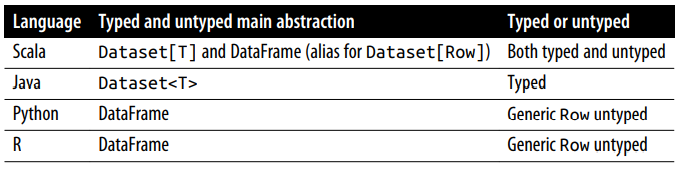

Esto se debe a que los dataframes guardan filas que son objetos genéricos y los datasets guardan objetos áltamente tipados.

Python y R son lenguajes que no necesitan definir los tipos de variables ya que lo definen automáticamente durante la ejecución del código, no durante el compilado de ellas.
EN el caso de Scala y Java, son lo contrario, es necesario especificar los tipos ya que lo realizarn en tiempo de compilación.

Por lo que no usaremos Python para utilizar datasets, únicamente en Scala.

OJO: No confundir estos datasets con los de la librería pandas, son cosas distintas. Aquí en Apache Spark los datasets son áltamente tipados y es necesario definir como en Dataframes, un squema.




### Scala: Case Classes (squema en Datasets)

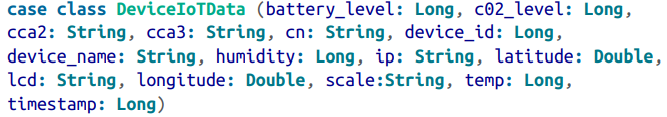

In [ ]:
//Para los datasets, cuando declaras una clase para estructurar el formato del dataset, siempre declarar en una celda aparte
case class DeviceIoTData(battery_level: Long, c02_level: Long,
cca2: String, cca3: String, cn: String, device_id: Long,
device_name: String, humidity: Long, ip: String, latitude: Double,
lcd: String, longitude: Double, scale:String, temp: Long,
timestamp: Long)

In [ ]:


val ds = spark.read.json("iot_devices.json").as[DeviceIoTData]
ds.show(5)


In [ ]:
// In Scala
val filterTempDS = ds.where("temp > 30 AND humidity > 70")
filterTempDS.show(5, false)
//Se raya cuando usamos filter y mapeos, DAG no se realiza bien y Spark no puede optimizar bien con el Catalyst

In [ ]:
val filterTempDS = ds.filter(d => {d.temp > 30 && d.humidity > 70})
filterTempDS.take(5)
//val filterTempDS = ds.filter($"temp" > 30 && $"humidity" > 70)
//filterTempDS.show()

In [ ]:
case class DeviceTempByCountry(temp: Long, device_name: String, device_id: Long, cca3: String)

In [ ]:
val dsTemp2 = ds
 .select($"temp", $"device_name", $"device_id", $"device_id", $"cca3") //Si usas col() también irá, creo
 .where("temp > 25")
 .as[DeviceTempByCountry]

dsTemp2.show(5)

# Diferencias entre DataFrames, Datasets y RDD

Ya se ha explicado con anterioridad, pero hay casos donde es más útil utilizar una API frente a otros:

Para decirle a Spark qué hacer, en vez de cómo hacer, se usa Dataframes y datasets, ya que con el Catalyst te optimiza de la mejor forma las instrucciones de alto nivel de las APIS de Dataframe y Dataset. Sin embargo, las transformaciones y acciones de un RDD define la ejecución computacional que realizará Spark. Si haces un map() y luego un filter(), Spark te lo hace como se lo digas. Si usas select, where con df o ds, te optimiza la ejecución y realiza transformaciones y acciones como Spark quiera.

Si usas lenguajes fuertemente tipados como Java que se definan en tiempo de compilación, se usa Datasets.

Si usas queries parecidos a SQL, usa Dataframes

Si usas Python o R usa Dataframes.

Si necesitas paquetes de terceros escritos en RDD, usa RDD

Si quieres explicar a Spark co+ómo hacer las cosas, usa RDD

# Catalyst

Recoge una instrucción de alto nivel y optimiza su computación realizando un plan de ejecución.
Las fases del plan son:
1. Análisis
2. Optimización lógica
3. Planificación Física
4. Generación de código

### Ejercicios externos Capítulo 3

In [62]:
val mnmFile = "mnm_dataset.csv"
    // read the file into a Spark DataFrame
val mnmDF = spark.read.format("csv")
      .option("header", "true")
      .option("inferSchema", "true")
      .load(mnmFile)
    // display DataFrame

mnmFile: String = mnm_dataset.csv
mnmDF: org.apache.spark.sql.DataFrame = [State: string, Color: string ... 1 more field]


In [63]:
//B
print(mnmDF.printSchema())
//C El segundo parámetro se refiere a si puede o no contener un dato nulo, si es False, no puede contener campos Nulos
//D A nivel de código, La API de Dataframe sirve para realizar funciones semejantes al lenguaje de SQL, Datasets, puedes combinar
//los mismos tipos de queries, con funcionces tipo lambda con map() reduce() y utiliza el Catalyst para optimizar la ejecución.


root
 |-- State: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Count: integer (nullable = true)

()

In [ ]:
// In Scala it would be similar
import org.apache.spark.sql.types._

val fireSchema = StructType(Array(StructField("UnitID", StringType, true),
 StructField("IncidentNumber", IntegerType, true),
 StructField("CallType", StringType, true), 
 StructField("CallDate", StringType, true), 
 StructField("WatchDate", StringType, true),
 StructField("CallFinalDisposition", StringType, true),
 StructField("AvailableDtTm", StringType, true),
 StructField("Address", StringType, true), 
 StructField("City", StringType, true), 
 StructField("Zipcode", IntegerType, true), 
 StructField("Battalion", StringType, true), 
 StructField("StationArea", StringType, true), 
 StructField("Box", StringType, true), 
 StructField("OriginalPriority", StringType, true), 
 StructField("Priority", StringType, true), 
 StructField("FinalPriority", IntegerType, true), 
 StructField("ALSUnit", BooleanType, true), 
 StructField("CallTypeGroup", StringType, true),
 StructField("NumAlarms", IntegerType, true),
 StructField("UnitType", StringType, true),
 StructField("UnitSequenceInCallDispatch", IntegerType, true),
 StructField("FirePreventionDistrict", StringType, true),
 StructField("SupervisorDistrict", StringType, true),
 StructField("Neighborhood", StringType, true),
 StructField("Location", StringType, true),
 StructField("RowID", StringType, true),
 StructField("Delay", FloatType, true)))
// Read the file using the CSV DataFrameReader
val sfFireFile="sf-fire-calls.csv"
val fireDF = spark.read.schema(fireSchema)
 .option("header", "true")
 .csv(sfFireFile)

In [4]:
//Avro es externo a Spark por lo que es necesario descargar un jar e importar la librería avro
import org.apache.spark.sql.avro.functions._

fireDF.rdd.getNumPartitions

//De dataframe a fichero AVRO
fireDF.write
 .format("avro")
 .mode("overwrite")
 .save("Avro/fireAvro")
//En caso de cambiar el número de particiones a 1:
fireDF.repartition(1)
 .write
 .format("avro")
 .mode("overwrite")
 .save("Avro/fireAvro2")


In [ ]:
//3 posibles casos
//mira diferencia entre coalesce y repartition
//fireDF.write.format("json").save("prueba.json")
//fireDF.repartition(1).write.format("json").save("prueba1.json")
val p1 = mnmDF.repartition(6,col("Color"))
p1.rdd.getNumPartitions
//probar a jugar con los parámetros de repartition

In [ ]:
//Buscar una alternativa para escribir el nombre del color en vez de partition_id
p1.withColumn("partition_id", spark_partition_id()).withColumn("Color", col("Color")).groupBy("partition_id", "Color").agg(count("Color")).orderBy("partition_id").show()

In [ ]:
#in python
def print_partitions(df):
numPartitions = df.rdd.getNumPartitions()
print("Total partitions: {}".format(numPartitions))
print("Partitioner: {}".format(df.rdd.partitioner))
df.explain()
parts = df.rdd.glom().collect()
i = 0
j = 0
for p in parts:
print("Partition {}:".format(i))
for r in p:
print("Row {}:{}".format(j, r))
j = j+1
i = i+1

print_partitions(df_prueba)

# Capítulo 4 Spark SQL y Dataframes

En éste capítulo vamos a hablar sobre la interfaz SQL y los dataframes. EN el capítulo anterior hablamos de funciones que tienens las APIs de Dataframe t Dataset, pero en este capítulo vamos a ir un poco más allá.

Es posible utilizar en Spark toda sentencia SQL con la función sql(). Por ejemplo sql(Select * FROM Tabla) La función devuelve un dataframe con los datos que quieres.

En este ejemplo, vamos a insertar los datos leídos en una tabla temporal:


In [1]:
// Path to data set 
val csvFile="departuredelays.csv"
// Read and create a temporary view
// Infer schema (note that for larger files you may want to specify the schema)
val df = spark.read.format("csv")
 .option("inferSchema", "true")
 .option("header", "true")
 .load(csvFile)
// Create a temporary view
df.createOrReplaceTempView("us_delay_flights_tbl")


Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002844.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1622802788408)
SparkSession available as 'spark'


csvFile: String = departuredelays.csv
df: org.apache.spark.sql.DataFrame = [date: int, delay: int ... 3 more fields]


In [3]:
sql("Show Tables").show()
sql("select * from us_delay_flights_tbl").show()

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
|        |us_delay_flights_tbl|       true|
+--------+--------------------+-----------+

+-------+-----+--------+------+-----------+
|   date|delay|distance|origin|destination|
+-------+-----+--------+------+-----------+
|1011245|    6|     602|   ABE|        ATL|
|1020600|   -8|     369|   ABE|        DTW|
|1021245|   -2|     602|   ABE|        ATL|
|1020605|   -4|     602|   ABE|        ATL|
|1031245|   -4|     602|   ABE|        ATL|
|1030605|    0|     602|   ABE|        ATL|
|1041243|   10|     602|   ABE|        ATL|
|1040605|   28|     602|   ABE|        ATL|
|1051245|   88|     602|   ABE|        ATL|
|1050605|    9|     602|   ABE|        ATL|
|1061215|   -6|     602|   ABE|        ATL|
|1061725|   69|     602|   ABE|        ATL|
|1061230|    0|     369|   ABE|        DTW|
|1060625|   -3|     602|   ABE|        ATL|
|1070600|    0|     369|   ABE|

In [4]:
df.printSchema

root
 |-- date: integer (nullable = true)
 |-- delay: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- destination: string (nullable = true)



In [43]:
val schema = "date STRING, delay INT, distance INT, origin STRING, destination STRING"


schema: String = date STRING, delay INT, distance INT, origin STRING, destination STRING


In [58]:
val df2 = spark.read.schema(schema).option("header", "true").csv(csvFile)
df2.printSchema
df2.show()

root
 |-- date: string (nullable = true)
 |-- delay: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- destination: string (nullable = true)

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01011245|    6|     602|   ABE|        ATL|
|01020600|   -8|     369|   ABE|        DTW|
|01021245|   -2|     602|   ABE|        ATL|
|01020605|   -4|     602|   ABE|        ATL|
|01031245|   -4|     602|   ABE|        ATL|
|01030605|    0|     602|   ABE|        ATL|
|01041243|   10|     602|   ABE|        ATL|
|01040605|   28|     602|   ABE|        ATL|
|01051245|   88|     602|   ABE|        ATL|
|01050605|    9|     602|   ABE|        ATL|
|01061215|   -6|     602|   ABE|        ATL|
|01061725|   69|     602|   ABE|        ATL|
|01061230|    0|     369|   ABE|        DTW|
|01060625|   -3|     602|   ABE|        ATL|
|01070600|    0|     369|   ABE| 

df2: org.apache.spark.sql.DataFrame = [date: string, delay: int ... 3 more fields]


In [24]:
//Muestra los 10 vuelos más largos que superen los 1000 millas
spark.sql("SELECT date, distance, origin, destination " +
"FROM us_delay_flights_tbl " +
"WHERE distance > 1000 ORDER BY distance DESC").show(10)

df.select("date", "distance", "origin", "destination")
 .where("distance > 1000")
 .orderBy(col("distance").desc).show(10)

+-------+--------+------+-----------+
|   date|distance|origin|destination|
+-------+--------+------+-----------+
|1091625|    4330|   HNL|        JFK|
|1051625|    4330|   HNL|        JFK|
|1081625|    4330|   HNL|        JFK|
|1021625|    4330|   HNL|        JFK|
|1041625|    4330|   HNL|        JFK|
|1061625|    4330|   HNL|        JFK|
|1071625|    4330|   HNL|        JFK|
|1011625|    4330|   HNL|        JFK|
|1111625|    4330|   HNL|        JFK|
|1031625|    4330|   HNL|        JFK|
+-------+--------+------+-----------+
only showing top 10 rows

+-------+--------+------+-----------+
|   date|distance|origin|destination|
+-------+--------+------+-----------+
|3131530|    4330|   HNL|        JFK|
|3071625|    4330|   HNL|        JFK|
|3121530|    4330|   HNL|        JFK|
|3021625|    4330|   HNL|        JFK|
|3061625|    4330|   HNL|        JFK|
|3081530|    4330|   HNL|        JFK|
|3091530|    4330|   HNL|        JFK|
|3011625|    4330|   HNL|        JFK|
|3151530|    4330|   HNL

In [21]:
//Muestra 10 vuelos que empiecen en SFO y terminen en ORD, que hayan tenido un delay
spark.sql("""SELECT date, delay, origin, destination 
FROM us_delay_flights_tbl 
WHERE delay > 120 AND ORIGIN = 'SFO' AND DESTINATION = 'ORD' 
ORDER by delay DESC""").show(10)

df.select("date","delay", "origin", "destination")
 .where(col("delay") > 120 && col("origin") === "SFO" && col("destination") === "ORD")
 .orderBy(col("delay").desc).show(10)

+-------+-----+------+-----------+
|   date|delay|origin|destination|
+-------+-----+------+-----------+
|2190925| 1638|   SFO|        ORD|
|1031755|  396|   SFO|        ORD|
|1022330|  326|   SFO|        ORD|
|1051205|  320|   SFO|        ORD|
|1190925|  297|   SFO|        ORD|
|2171115|  296|   SFO|        ORD|
|1071040|  279|   SFO|        ORD|
|1051550|  274|   SFO|        ORD|
|3120730|  266|   SFO|        ORD|
|1261104|  258|   SFO|        ORD|
+-------+-----+------+-----------+
only showing top 10 rows

+-------+-----+------+-----------+
|   date|delay|origin|destination|
+-------+-----+------+-----------+
|2190925| 1638|   SFO|        ORD|
|1031755|  396|   SFO|        ORD|
|1022330|  326|   SFO|        ORD|
|1051205|  320|   SFO|        ORD|
|1190925|  297|   SFO|        ORD|
|2171115|  296|   SFO|        ORD|
|1071040|  279|   SFO|        ORD|
|1051550|  274|   SFO|        ORD|
|3120730|  266|   SFO|        ORD|
|1261104|  258|   SFO|        ORD|
+-------+-----+------+-------

In [19]:
//Nombra un tipo de delay para cada caso
spark.sql("""SELECT delay, origin, destination,
 CASE
 WHEN delay > 360 THEN 'Very Long Delays'
 WHEN delay > 120 AND delay < 360 THEN 'Long Delays'
 WHEN delay > 60 AND delay < 120 THEN 'Short Delays'
 WHEN delay > 0 and delay < 60 THEN 'Tolerable Delays'
 WHEN delay = 0 THEN 'No Delays'
 ELSE 'Early'
 END AS Flight_Delays
 FROM us_delay_flights_tbl
 ORDER BY origin, delay DESC""").show(10)

df.select($"delay", $"origin", $"destination")
 .withColumn("Flight_Delays", when($"delay" > 360, "Very Long Delays")
             .when($"delay" > 120 && $"delay" < 360, "Long Delays")
             .when($"delay" > 60 && $"delay" < 120, "Short Delays")
             .when($"delay" > 0 && $"delay" < 600, "Tolerable Delays")
             .when($"delay" === 0, "No Delays")
             .otherwise("Early"))
 .orderBy(col("origin").desc, col("delay").desc).show()

+-----+------+-----------+-------------+
|delay|origin|destination|Flight_Delays|
+-----+------+-----------+-------------+
|  333|   ABE|        ATL|  Long Delays|
|  305|   ABE|        ATL|  Long Delays|
|  275|   ABE|        ATL|  Long Delays|
|  257|   ABE|        ATL|  Long Delays|
|  247|   ABE|        ATL|  Long Delays|
|  247|   ABE|        DTW|  Long Delays|
|  219|   ABE|        ORD|  Long Delays|
|  211|   ABE|        ATL|  Long Delays|
|  197|   ABE|        DTW|  Long Delays|
|  192|   ABE|        ORD|  Long Delays|
+-----+------+-----------+-------------+
only showing top 10 rows

+-----+------+-----------+----------------+
|delay|origin|destination|   Flight_Delays|
+-----+------+-----------+----------------+
|  475|   YUM|        PHX|Very Long Delays|
|  347|   YUM|        LAX|     Long Delays|
|  333|   YUM|        LAX|     Long Delays|
|  285|   YUM|        PHX|     Long Delays|
|  267|   YUM|        LAX|     Long Delays|
|  236|   YUM|        LAX|     Long Delays|
|  2

### Metastore

Por defecto, todas las tablas generadas con los datos, se almacenan en el metastore de Hive, en el directorio /user/hive/warehouse.

Se puede cambiar esta ubicación para almacenarlo en otro directorio e incluso en algún servidor externo.

Para poder ver los metadatos, se puede usar las funcionalidades de Catalog 
Spark te deja crear 2 tipos de tablas, administrada y no administrada. Administrada quiere decir que Spark controla los metadatos tanto de la tabla como de los datos. La no administrada, únicamente controla las de la tabla, y los datos se deben administrar en algún recurso externo como Cassandra.

Todas las tablas que se crean tienen que estar enlazadas con una base de datos. Por defecto, todas las tablas generadas, se crean en base a "default" database.

En estos ejemplos, vamos a crear los dos tipos de tablas:

In [4]:
//Para crear tu propio database, fíjate que se parece a los comandos estudiados en Hive, mi teoría es que sql() utiliza la API de Hive
spark.sql("CREATE DATABASE learn_spark_db")
spark.sql("USE learn_spark_db")

res3: org.apache.spark.sql.DataFrame = []


In [5]:
//Da error, lo más probable es que se necesite especificar as Hive para crearlo
spark.sql("CREATE TABLE managed_us_delay_flights_tbl (date STRING, delay INT, distance INT, origin STRING, destination STRING)")

org.apache.spark.sql.AnalysisException:  Hive support is required to CREATE Hive TABLE (AS SELECT);

In [7]:
//Crea una tabla administrada
val csv_file = "departuredelays.csv"
val schema="date STRING, delay INT, distance INT, origin STRING, destination STRING"
val flights_df = spark.read.schema(schema).option("header", "true").csv(csv_file)
flights_df.write.saveAsTable("managed_us_delay_flights_tbl")


csv_file: String = departuredelays.csv
schema: String = date STRING, delay INT, distance INT, origin STRING, destination STRING
flights_df: org.apache.spark.sql.DataFrame = [date: string, delay: int ... 3 more fields]


In [12]:
//Crea una tabla no administrada
flights_df
 .write
 .option("path", "/tmp/data/us_flights_delay")
 .saveAsTable("us_delay_flights_tbl3")

org.apache.spark.sql.AnalysisException:  Table `us_delay_flights_tbl2` already exists.

### Creación de vistas

Es posible crear vistas temporales dentro de Spark.
Las vistas pueden actuar como si fueran tablas, usando las APIs o sentencias SQL puedes mostrar datos de ella.
Sin embargo, las vistas no contienen en realidad los datos, y en el momento que se termine la Spark session, se borra la vista. En cambio, con las tablas, estos se persisten.
Las vistas pueden ser globales o no globales. La diferencia es que las globales pueden ser usadas en cualquier Spark Session dentro de un clúster y el otro únicamente en la Spark Session donde se ha creado.

Hay que tener en cuenta de que si usamos vistas globales, es necesario utilizar el prefijo global_temp ya que por defecto, todas las vistas globales se crean en una base de datos global llamada global.temp

In [38]:
val df_sfo = spark.sql("SELECT date, delay, origin, destination FROM us_delay_flights_tbl WHERE origin = 'SFO'")
val df_jfk = spark.sql("SELECT date, delay, origin, destination FROM us_delay_flights_tbl WHERE origin = 'JFK'")
// Create a temporary and global temporary view
df_sfo.createOrReplaceGlobalTempView("us_origin_airport_SFO_global_tmp_view")
df_jfk.createOrReplaceTempView("us_origin_airport_JFK_tmp_view")

df_sfo: org.apache.spark.sql.DataFrame = [date: int, delay: int ... 2 more fields]
df_jfk: org.apache.spark.sql.DataFrame = [date: int, delay: int ... 2 more fields]


In [42]:
//En caso de querer leer datos de la vista global
val globaldf = spark.read.table("global_temp.us_origin_airport_SFO_global_tmp_view")
globaldf.show()
//En caso de querer leer datos de una vista normal
val normaldf = spark.read.table("us_origin_airport_JFK_tmp_view")
// Or
spark.sql("SELECT * FROM us_origin_airport_JFK_tmp_view").show()


+-------+-----+------+-----------+
|   date|delay|origin|destination|
+-------+-----+------+-----------+
|1011250|   55|   SFO|        JFK|
|1012230|    0|   SFO|        JFK|
|1010705|   -7|   SFO|        JFK|
|1010620|   -3|   SFO|        MIA|
|1010915|   -3|   SFO|        LAX|
|1011005|   -8|   SFO|        DFW|
|1011800|    0|   SFO|        ORD|
|1011740|   -7|   SFO|        LAX|
|1012015|   -7|   SFO|        LAX|
|1012110|   -1|   SFO|        MIA|
|1011610|  134|   SFO|        DFW|
|1011240|   -6|   SFO|        MIA|
|1010755|   -3|   SFO|        DFW|
|1010020|    0|   SFO|        DFW|
|1010705|   -6|   SFO|        LAX|
|1010925|   -3|   SFO|        ORD|
|1010555|   -6|   SFO|        ORD|
|1011105|   -8|   SFO|        DFW|
|1012330|   32|   SFO|        ORD|
|1011330|    3|   SFO|        DFW|
+-------+-----+------+-----------+
only showing top 20 rows

+-------+-----+------+-----------+
|   date|delay|origin|destination|
+-------+-----+------+-----------+
|1010900|   14|   JFK|       

globaldf: org.apache.spark.sql.DataFrame = [date: int, delay: int ... 2 more fields]
normaldf: org.apache.spark.sql.DataFrame = [date: int, delay: int ... 2 more fields]


In [43]:
//Para borrar vistas
spark.catalog.dropGlobalTempView("us_origin_airport_SFO_global_tmp_view")
spark.catalog.dropTempView("us_origin_airport_JFK_tmp_view")


res35: Boolean = true


In [16]:
//Uso de las funciones Catalog para visualizar metadatos

spark.catalog.listDatabases().show()
spark.catalog.listTables().show()
spark.catalog.listColumns("us_delay_flights_tbl").show()

+--------------+----------------+--------------------+
|          name|     description|         locationUri|
+--------------+----------------+--------------------+
|       default|default database|file:/C:/Users/ji...|
|learn_spark_db|                |file:/C:/Users/ji...|
+--------------+----------------+--------------------+

+--------------------+--------------+-----------+---------+-----------+
|                name|      database|description|tableType|isTemporary|
+--------------------+--------------+-----------+---------+-----------+
|managed_us_delay_...|learn_spark_db|       null|  MANAGED|      false|
|us_delay_flights_tbl|learn_spark_db|       null| EXTERNAL|      false|
|us_delay_flights_...|learn_spark_db|       null| EXTERNAL|      false|
|us_delay_flights_tbl|          null|       null|TEMPORARY|       true|
+--------------------+--------------+-----------+---------+-----------+

+-----------+-----------+--------+--------+-----------+--------+
|       name|description|da

In [50]:
//También es posible cachear tablas y vistas

spark.sql("CACHE LAZY TABLE us_delay_flights_tbl")
spark.sql("UNCACHE TABLE us_delay_flights_tbl")

res42: org.apache.spark.sql.DataFrame = []


## Fuentes de datos para crear Dataframes y Tablas SQL

Como ya se explicó en el capítulo anterior, existen muchos fuentes de datos como Parquet, Json, CSV, etc etc. En este apartado se explicará individualmente estas fuentes de datos y cómo afectan a los dataframes y tablas SQL.

Lo primero que hay que tener en cuenta es que existen una API de Data Source donde contiene funciones para leer y escribir dataframes en base a estos fuentes de datos: DataframeReader y DataframeWritter.

In [72]:
//DataframeReader
val file = "prueba4.parquet"
val df = spark.read.format("parquet").load(file)
// Use Parquet; you can omit format("parquet") if you wish as it's the default
val df2 = spark.read.load(file)
// Use CSV
val df3 = spark.read.format("csv")
 .option("inferSchema", "true")
 .option("header", "true")
 .option("mode", "PERMISSIVE")
 .load("mnm_dataset.csv")
//DataframeWritter
df3.write.format("json").mode("overwrite").save("prueba2.json")

file: String = prueba4.parquet
df: org.apache.spark.sql.DataFrame = [UnitID: string, IncidentNumber: int ... 25 more fields]
df2: org.apache.spark.sql.DataFrame = [UnitID: string, IncidentNumber: int ... 25 more fields]
df3: org.apache.spark.sql.DataFrame = [State: string, Color: string ... 1 more field]


### Parquet

Como ya sabemos Parquet es el formato predeterminado elegido por Apache Spark porque su óptima forma de procesar datos en forma columnar. No es necesario inferir ningún schema ya que te lo hace solo. También en caso de cargar un dataframe en base a un parquet, tampoco es necesario crear un schema ya que ya contiene un schema almacenado. Solo en caso de estar leyendo por streaming, no es necesario especificar un schema en Parquet
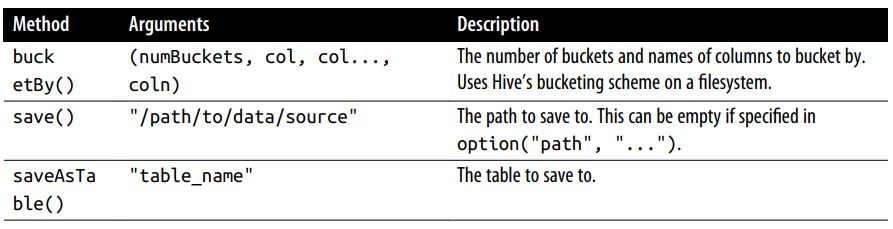

In [75]:
//Parquet a dataframe
val file = "2010-summary.parquet"
val dfParquet = spark.read.format("parquet").load(file)
//Dataframe a tabla
dfParquet.write.mode("overwrite").saveAsTable("parquet_table")

file: String = 2010-summary.parquet
dfParquet: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [80]:
//Crea con una sentencia SQL un nuevo Dataframe y guárdalo en un fichero parquet
val dfParquet2 = spark.sql("SELECT * FROM parquet_table WHERE count > 400")
dfParquet2.write.format("parquet")
 .mode("overwrite")
 .option("compression", "snappy")
 .save("Parquet/df_parquet")

dfParquet2: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


### JSON

Json es un formato de datos popular también, por su estructura simple para leer los datos.
Hay dos formas de leler un JSON, single-line y multiple-line mode.
Single-line lee cada línea del fichero y lo convierte en un objeto JSON. En cambio, en el otro modo, puede leer varias líneas y convertirlo en JSON, este caso es necesario especificarlo como .option("multiline", true)
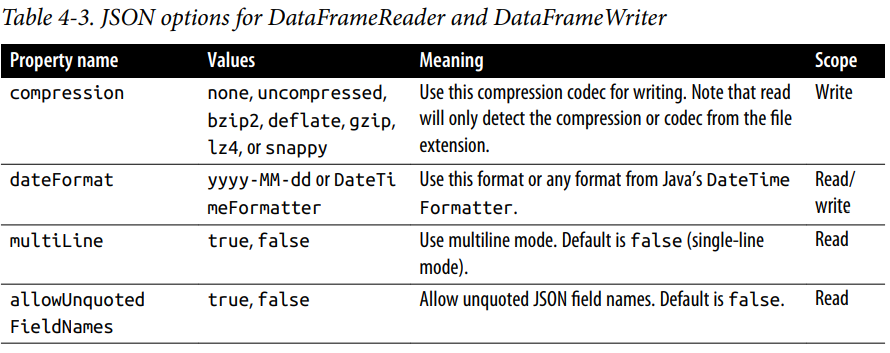

In [82]:
//Lectura de un JSON y cargarlo en un dataframe
val file = "summary-data/json/*"
val dfJson = spark.read.format("json").load(file)

file: String = summary-data/json/*
dfJson: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [87]:
//Crear una tabla temporal y realizar una consulta SQL
dfJson.createOrReplaceTempView("json_table")
val dfJson2 = spark.sql("SELECT * FROM json_table WHERE count > 400")

dfJson2: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [91]:
dfJson2.write.format("json")
 .mode("overwrite")
 .save("Json/df_json3")


### CSV

CSV es uno de los formato más comúnes para leer datos en texto claro. Suele contener una cabecera, y los datos delimitados por algún carácter como ',' 

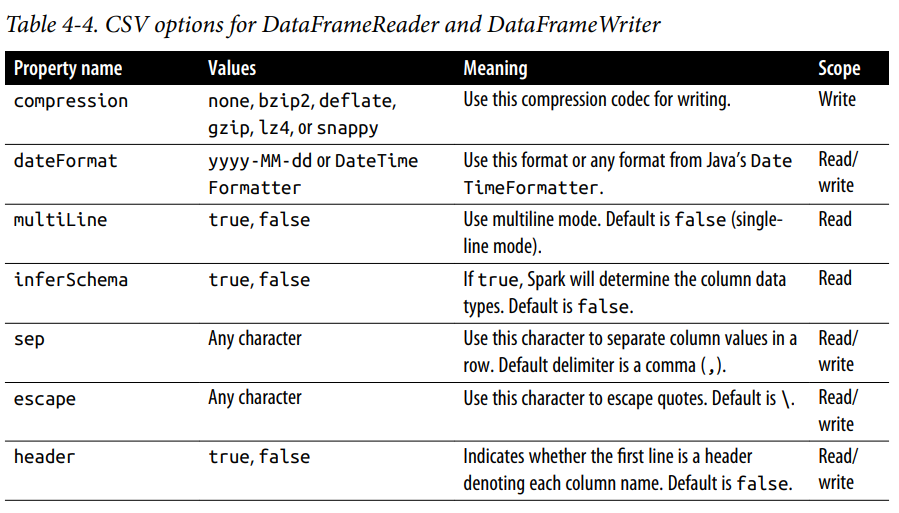

In [93]:
//En este caso se ha creado un schema, pero puedes inferir uno con .option("inferSchema", true)
val file = "summary-data/csv/*"
val schema = "DEST_COUNTRY_NAME STRING, ORIGIN_COUNTRY_NAME STRING, count INT"
val dfCsv = spark.read.format("csv")
 .schema(schema)
 .option("header", "true")
 .option("mode", "FAILFAST") // Exit if any errors
 .option("nullValue", "") // Replace any null data with quotes
 .load(file)

file: String = summary-data/csv/*
schema: String = DEST_COUNTRY_NAME STRING, ORIGIN_COUNTRY_NAME STRING, count INT
dfCsv: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [98]:
//Crear una tabla temporal y realizar una consulta SQL
dfCsv.createOrReplaceTempView("csv_table")
val dfCsv2 = spark.sql("SELECT * FROM csv_table WHERE count > 400")

dfCsv2: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [99]:
//De la misma forma que siempre, se guarda el dataframe en un csv
dfCsv2.write.format("csv").mode("overwrite").save("Csv/df_csv")

### Avro

Es un formato compatible con el mapeo con JSON y es muy eficiente y rápido. Es compatible con muchos lenguajes de programación.
Al igual de Parquet, también almacena el schema de los datos para optimizar su formación.

Avro se creó para serializar los datos dentro de Apache Hadoop, persistente en HDFS para que se puedan distribuir la información en todos los nodos del clúster.
En este caso, los schemas están en formato JSOn para que sean más compatibles con otros lenguajes de programación.
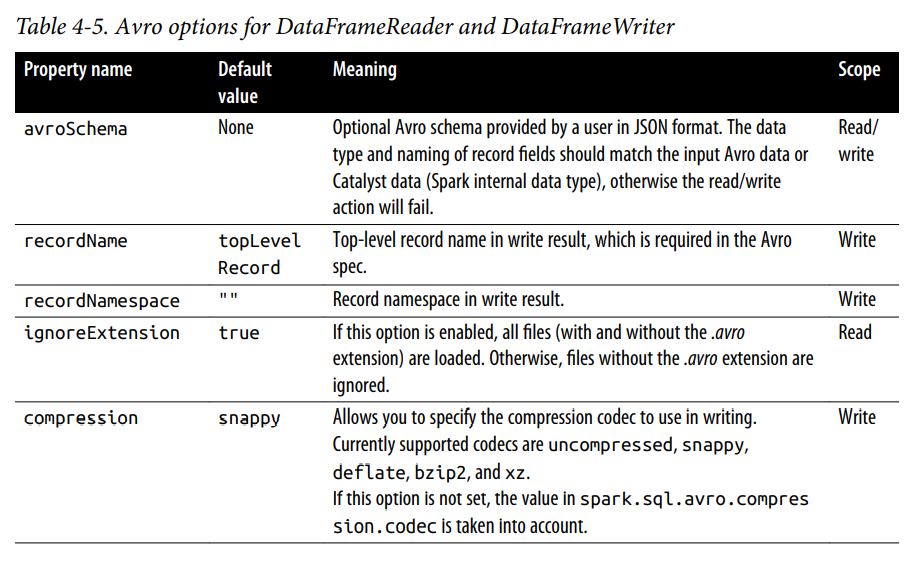

In [2]:
//Avro es externo a Spark por lo que es necesario descargar un jar e importar la librería avro
import org.apache.spark.sql.avro.functions._

val dfAvro = spark.read.format("avro")
 .load("summary-data/avro/*")
dfAvro.show(false)


+--------------------------------+-------------------+-----+
|DEST_COUNTRY_NAME               |ORIGIN_COUNTRY_NAME|count|
+--------------------------------+-------------------+-----+
|United States                   |Romania            |1    |
|United States                   |Ireland            |264  |
|United States                   |India              |69   |
|Egypt                           |United States      |24   |
|Equatorial Guinea               |United States      |1    |
|United States                   |Singapore          |25   |
|United States                   |Grenada            |54   |
|Costa Rica                      |United States      |477  |
|Senegal                         |United States      |29   |
|United States                   |Marshall Islands   |44   |
|Guyana                          |United States      |17   |
|United States                   |Sint Maarten       |53   |
|Malta                           |United States      |1    |
|Bolivia                

import org.apache.spark.sql.avro.functions._
dfAvro: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [4]:
//Crear una tabla temporal y realizar una consulta SQL
dfAvro.createOrReplaceTempView("avro_table")
val dfAvro2 = spark.sql("SELECT * FROM avro_table WHERE count > 400")

dfAvro2: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [6]:
//De dataframe a fichero AVRO
dfAvro2.write
 .format("avro")
 .mode("overwrite")
 .save("Avro/df_avro")

### ORC

ORC (Optimized Rows Columnar) es un formato creado para almacenar datos en Hive de forma eficiente. Tiene un footer file donde contiene la información de la estructura de los datos como sus tipos de variables.
La ventaja principal es que lee bloques de filas, no fila por fila, ahorrando bastante carga de CPU.


In [6]:
//Lectura de fichero ORC a dataframe
val file = "summary-data/orc/*"
val dfORC = spark.read.format("orc").load(file)
dfORC.show(10, false)


+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |1    |
|United States    |Ireland            |264  |
|United States    |India              |69   |
|Egypt            |United States      |24   |
|Equatorial Guinea|United States      |1    |
|United States    |Singapore          |25   |
|United States    |Grenada            |54   |
|Costa Rica       |United States      |477  |
|Senegal          |United States      |29   |
|United States    |Marshall Islands   |44   |
+-----------------+-------------------+-----+
only showing top 10 rows



file: String = summary-data/orc/*
dfORC: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [7]:
//Crear una tabla temporal y realizar una consulta SQL
dfORC.createOrReplaceTempView("avro_table")
val dfORC2 = spark.sql("SELECT * FROM avro_table WHERE count > 400")

dfORC2: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [8]:
//Escritura de dataframe a fichero ORC
dfORC2.write.format("orc")
 .mode("overwrite")
 .option("compression", "snappy")
 .save("Orc/df_orc")

### Imagen

En spark 2.4 se inició un nuevo formato imagen para frameworks sobre machine learning como Tensoflow o Pytorch.
Para realizar visualizaciones, el formato de imagen es muy importante.

In [11]:
import org.apache.spark.ml.source.image
val imageDir = "train_images/"
val imagesDF = spark.read.format("image").load(imageDir)
imagesDF.printSchema
imagesDF.select("image.height", "image.width", "image.nChannels", "image.mode", "label").show(5, false)


root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)
 |-- label: integer (nullable = true)

+------+-----+---------+----+-----+
|height|width|nChannels|mode|label|
+------+-----+---------+----+-----+
|288   |384  |3        |16  |0    |
|288   |384  |3        |16  |1    |
|288   |384  |3        |16  |0    |
|288   |384  |3        |16  |0    |
|288   |384  |3        |16  |0    |
+------+-----+---------+----+-----+
only showing top 5 rows



import org.apache.spark.ml.source.image
imageDir: String = train_images/
imagesDF: org.apache.spark.sql.DataFrame = [image: struct<origin: string, height: int ... 4 more fields>, label: int]


### Ficheros Binarios

En Spark 3.0, dió la posibilidad de leer y escribir ficheros binarios. Transforma cada fichero binario en una fila de dataframe que contiene los metadatos y los datos. 
El fichero binario produce produce un datafram con la siguiente estructura:
<ul>
    <li> path: StringType </li>
    <li> modificationTime: Timestamp Type</li>
    <li> length: LongType</li>
    <li> content: BinaryType</li>
</ul>

In [14]:
//Las imágenes son fichero binarios 
val path = "train_images/"
val binaryFilesDF = spark.read.format("binaryFile")
 .option("pathGlobFilter", "*.jpg")
 .load(path)
binaryFilesDF.show(5)
//Actualmente, DataframeWriter no es compatible con crear ficheros binarios a partir de un dataframe

+--------------------+-------------------+------+--------------------+-----+
|                path|   modificationTime|length|             content|label|
+--------------------+-------------------+------+--------------------+-----+
|file:/C:/Users/ji...|2021-04-15 02:34:17| 55037|[FF D8 FF E0 00 1...|    0|
|file:/C:/Users/ji...|2021-04-15 02:34:17| 54634|[FF D8 FF E0 00 1...|    1|
|file:/C:/Users/ji...|2021-04-15 02:34:17| 54624|[FF D8 FF E0 00 1...|    0|
|file:/C:/Users/ji...|2021-04-15 02:34:17| 54505|[FF D8 FF E0 00 1...|    0|
|file:/C:/Users/ji...|2021-04-15 02:34:17| 54475|[FF D8 FF E0 00 1...|    0|
+--------------------+-------------------+------+--------------------+-----+
only showing top 5 rows

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: integer (nullable = true)



path: String = train_images/
binaryFilesDF: org.apache.spark.sql.DataFrame = [path: string, modificationTime: timestamp ... 3 more fields]


## Ejercicios Externos: Capítulo 4

B) Diferencias entre GlobalTempView y TempView.

La diferencia es que las globales pueden ser usadas en cualquier Spark Session dentro de un clúster y el otro únicamente en la Spark Session donde se ha creado.

Hay que tener en cuenta de que si usamos vistas globales, es necesario utilizar el prefijo global_temp ya que por defecto, todas las vistas globales se crean en una base de datos global llamada global.temp

In [17]:
//Json
val dfJson = spark.read.format("json").load("prueba2.json")
dfJson.show(5, false)

+------+-----+-----+
|Color |Count|State|
+------+-----+-----+
|Red   |20   |TX   |
|Blue  |66   |NV   |
|Blue  |79   |CO   |
|Blue  |71   |OR   |
|Yellow|93   |WA   |
+------+-----+-----+
only showing top 5 rows



dfJson: org.apache.spark.sql.DataFrame = [Color: string, Count: bigint ... 1 more field]


In [18]:
//Parquet
val dfParquet = spark.read.format("parquet").load("prueba4.parquet")
dfParquet.show(5, false)

+--------+--------------+--------+----------------+----------+--------------------+-------------+----------------------+---------------------------+-------+---------+-----------+---+----------------+--------+-------------+-------+-------------+---------+--------+--------------------------+----------------------+------------------+------------+---------------------+-------------------------------------+-----+
|UnitID  |IncidentNumber|CallType|CallDate        |WatchDate |CallFinalDisposition|AvailableDtTm|Address               |City                       |Zipcode|Battalion|StationArea|Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|Neighborhood|Location             |RowID                                |Delay|
+--------+--------------+--------+----------------+----------+--------------------+-------------+----------------------+---------------------------+-------+---------+----------

dfParquet: org.apache.spark.sql.DataFrame = [UnitID: string, IncidentNumber: int ... 25 more fields]


# Capítulo 5: Spark SQL y Dataframes: Uso de fuentes de datos externos

### UDF (User-Defined Functions)
Aunque en las APIs haya una cantidad abrumadora de funciones definidas, Apache Spark habilita el uso de funciones personales definidas.
La ventaja es que se pueden utilizar con sentencias SQL, cosa que a mi parecer es de lo más útil.

Una cosa que hay que tener en cuenta a la hora de realizar sentencias SQL son que no se garantiza el orden en las funciones SQL.
Por ejemplo spark.sql("SELECT s FROM test1 WHERE s IS NOT NULL AND strlen(s) > 1"), no se garantiza que IS NOT NULL se compruebe antes que el strlen(s)

Los UDFs en PySpark son computacionalmente lentos ya que necesitan un movimiento elevado de datos. Para resolverlo, introdujeron en la versión Apache Spark 2.3 los UDF de Pandas. Estos UDF usan APache Arrow y Pandas para la transferecia de datos. Para definir un UDF de pandas, se utiliza la funcion pandas_udf.

Ahora mismo, Pandas UDFs está dividido en 2 categorías, Pandas UDFs y Pandas Functions API

In [1]:
//Crea una función que te calcula el cubo de un número 
val cubed = (s: Long) => {
 s * s * s
}
// Register UDF
spark.udf.register("cubed", cubed)
// Crea una tabla temporal con 9 filas del 1 al 9
spark.range(1, 9).createOrReplaceTempView("udf_test")
//Muestra el contenido de la tabla, usando como segunda columna la función UDF
spark.sql("SELECT id, cubed(id) AS id_cubed FROM udf_test").show()

Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002844.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1622792122507)
SparkSession available as 'spark'


+---+--------+
| id|id_cubed|
+---+--------+
|  1|       1|
|  2|       8|
|  3|      27|
|  4|      64|
|  5|     125|
|  6|     216|
|  7|     343|
|  8|     512|
+---+--------+



cubed: Long => Long = $Lambda$1985/0x0000000801426428@49d40fdd


In [2]:
# In Python
# Import pandas
import pandas as pd
# Import various pyspark SQL functions including pandas_udf
from pyspark.sql.functions import col, pandas_udf
from pyspark.sql.types import LongType
# Declare the cubed function 
def cubed(a: pd.Series) -> pd.Series:
    return a * a * a
# Create the pandas UDF for the cubed function 
cubed_udf = pandas_udf(cubed, returnType=LongType()) #Esta funcion es diferente al otro


In [3]:
#Usa Apache Arrow para la transferencia de datos
x = pd.Series([1, 2, 3])
# The function for a pandas_udf executed with local Pandas data
print(cubed(x))

0     1
1     8
2    27
dtype: int64


In [4]:
#Usa Spark Dataframe para ejecutar un el Pandas UDF 
df = spark.range(1, 4)
# Execute function as a Spark vectorized UDF
df.select("id", cubed_udf(col("id"))).show()


+---+---------+
| id|cubed(id)|
+---+---------+
|  1|        1|
|  2|        8|
|  3|       27|
+---+---------+



Al ejecutarlo con Spark Dataframe, se generan Jobs y se podrá visualizar el DAG generado. En cambio, utilizando Apache pandas, todo se ejecuta a nivel del Drive por lo que no se generará ningún DAG

## Consultas con SQL-shell, Beeline y Tableau

Es posible realizar consultas SQL en APache spark con distintos metodologías:

### PostGreSQL
 Una de las formas más convenientes es con spark-sql CLI, que utiliza el metastore de Hive.

In [ ]:
val jdbcDF1 = spark
 .read
 .format("jdbc")
 .option("url", "jdbc:postgresql://localhost:5432/postgres")
 .option("dbtable", "public.prueba")
 .option("user", "postgres")
 .option("password", "4gmq4jA8")
 .option("driver", "org.postgresql.Driver")
 .load()

Intitializing Scala interpreter ...

In [8]:
jdbcDF1.write.mode("overwrite").saveAsTable("prueba")

In [9]:
spark.sql("INSERT INTO prueba(id, name, color) VALUES(5, 'Jon', 'Verde')")

+---+------+-----+
| id|  name|color|
+---+------+-----+
|  0|   Jin| Azul|
|  0|Susana| Azul|
|  0|Susana| Azul|
|  3|Susana| Azul|
+---+------+-----+



res5: org.apache.spark.sql.DataFrame = []


In [13]:
val jdbcDF2 = spark.sql("Select * FROM prueba")

jdbcDF2: org.apache.spark.sql.DataFrame = [id: int, name: string ... 1 more field]


In [16]:
 jdbcDF2
 .write
 .format("jdbc")
 .option("url", "jdbc:postgresql://localhost:5432/postgres")
 .option("dbtable", "public.notebook")
 .option("user", "postgres")
 .option("password", "")
 .option("driver", "org.postgresql.Driver")
 .save()

### MySQL

In [3]:
val jdbcDF = spark
 .read
 .format("jdbc")
 .option("url", "jdbc:mysql://localhost:3306/")
 .option("driver", "com.mysql.jdbc.Driver")
 .option("dbtable", "world.city")
 .option("user", "root")
 .option("password", "1234")
 .load()


jdbcDF: org.apache.spark.sql.DataFrame = [ID: int, Name: string ... 3 more fields]


In [4]:
jdbcDF.show(false)



+---+-----------------+-----------+-------------+----------+
|ID |Name             |CountryCode|District     |Population|
+---+-----------------+-----------+-------------+----------+
|1  |Kabul            |AFG        |Kabol        |1780000   |
|2  |Qandahar         |AFG        |Qandahar     |237500    |
|3  |Herat            |AFG        |Herat        |186800    |
|4  |Mazar-e-Sharif   |AFG        |Balkh        |127800    |
|5  |Amsterdam        |NLD        |Noord-Holland|731200    |
|6  |Rotterdam        |NLD        |Zuid-Holland |593321    |
|7  |Haag             |NLD        |Zuid-Holland |440900    |
|8  |Utrecht          |NLD        |Utrecht      |234323    |
|9  |Eindhoven        |NLD        |Noord-Brabant|201843    |
|10 |Tilburg          |NLD        |Noord-Brabant|193238    |
|11 |Groningen        |NLD        |Groningen    |172701    |
|12 |Breda            |NLD        |Noord-Brabant|160398    |
|13 |Apeldoorn        |NLD        |Gelderland   |153491    |
|14 |Nijmegen         |N

### Azure Cosmos DB

In [1]:
import com.microsoft.azure.cosmosdb.spark.schema._
import com.microsoft.azure.cosmosdb.spark._
import com.microsoft.azure.cosmosdb.spark.config.Config

Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002844.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1623056646429)
SparkSession available as 'spark'


import com.microsoft.azure.cosmosdb.spark.schema._
import com.microsoft.azure.cosmosdb.spark._
import com.microsoft.azure.cosmosdb.spark.config.Config


## Funciones de alto nivel en Dataframes y Spark-SQL

En este apartado se manipularán variables de tipos complejos, para ello, utilizaremos UDF.

get_json_object(), from_json(), to_json(), explode(), y selectExpr() son unos ejemplos para manipular las variables.

Todas estas funciones, son completamente compatibles con Spark SQL, sin necesidad de utilizar la API de Dataframe.

In [17]:
spark.sql("Select explode(value) as id from (Select array(1, 2, 3, 4, 5) as value)").show()

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+



In [18]:
//En este ejemplo, vamos a usar transform(), que realiza una acción en forma de función lambda a cada elemento seleccionado
val t1 = Array(35, 36, 32, 30, 40, 42, 38)
val t2 = Array(31, 32, 34, 55, 56)
val tC = Seq(t1, t2).toDF("celsius")
tC.createOrReplaceTempView("tC")
// Show the DataFrame
tC.show()

spark.sql("SELECT celsius, transform(celsius, t -> ((t * 9) div 5) + 32) as fahrenheit FROM tC").show(false)

+--------------------+
|             celsius|
+--------------------+
|[35, 36, 32, 30, ...|
|[31, 32, 34, 55, 56]|
+--------------------+

+----------------------------+-------------------------------+
|celsius                     |fahrenheit                     |
+----------------------------+-------------------------------+
|[35, 36, 32, 30, 40, 42, 38]|[95, 96, 89, 86, 104, 107, 100]|
|[31, 32, 34, 55, 56]        |[87, 89, 93, 131, 132]         |
+----------------------------+-------------------------------+



t1: Array[Int] = Array(35, 36, 32, 30, 40, 42, 38)
t2: Array[Int] = Array(31, 32, 34, 55, 56)
tC: org.apache.spark.sql.DataFrame = [celsius: array<int>]


In [14]:
//También es posible realizar funciones lambda con la función filter
spark.sql("SELECT celsius, filter(celsius, t -> t > 38) as high FROM tC").show(false)

+----------------------------+--------+
|celsius                     |high    |
+----------------------------+--------+
|[35, 36, 32, 30, 40, 42, 38]|[40, 42]|
|[31, 32, 34, 55, 56]        |[55, 56]|
+----------------------------+--------+



In [15]:
//La función exists() devuelve true o false si se cumple una condición descrita en la función lambda
spark.sql("SELECT celsius, exists(celsius, t -> t = 38) as threshold FROM tC").show()

+--------------------+---------+
|             celsius|threshold|
+--------------------+---------+
|[35, 36, 32, 30, ...|     true|
|[31, 32, 34, 55, 56]|    false|
+--------------------+---------+



In [24]:
//La función reduce() simplifica en un único resultado el contenido de todo el array.

spark.sql("SELECT celsius, reduce(celsius, 0, (t, acc) -> t + acc, acc -> (acc div size(celsius) * 9 div 5) + 32) as avgFahrenheit FROM tC").show()
// Se da error, si se prueba en databricks se soluciona

org.apache.spark.sql.AnalysisException:  Undefined function: 'reduce'. This function is neither a registered temporary function nor a permanent function registered in the database 'default'.; line 1 pos 16

## Operaciones de Spark SQL relacionados con la API de Dataframe

En esta última sección se va a tratar las relaciones más comunes en sql:

1. Unions and joins
2. Windowing
3. Modifications


In [1]:
// In Scala
import org.apache.spark.sql.functions._
// Set file paths
val delaysPath = "departuredelays.csv"
val airportsPath = "airport-codes-na.txt"
// Obtain airports data set
val airports = spark.read
 .option("header", "true")
 .option("inferschema", "true")
 .option("delimiter", "\t")
 .csv(airportsPath)
airports.createOrReplaceTempView("airports_na")
// Obtain departure Delays data set
val delays = spark.read
 .option("header","true")
 .csv(delaysPath)
 .withColumn("delay", expr("CAST(delay as INT) as delay"))
 .withColumn("distance", expr("CAST(distance as INT) as distance"))
delays.createOrReplaceTempView("departureDelays")
// Create temporary small table
val foo = delays.filter(expr("origin == 'SEA' AND destination == 'SFO' AND date like '01010%' AND delay > 0"))
foo.createOrReplaceTempView("foo")

Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002844.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1623316827432)
SparkSession available as 'spark'


import org.apache.spark.sql.functions._
delaysPath: String = departuredelays.csv
airportsPath: String = airport-codes-na.txt
airports: org.apache.spark.sql.DataFrame = [City: string, State: string ... 2 more fields]
delays: org.apache.spark.sql.DataFrame = [date: string, delay: int ... 3 more fields]
foo: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [date: string, delay: int ... 3 more fields]


In [28]:
spark.sql("SELECT * FROM airports_na").show()
spark.sql("SELECT * FROM departureDelays").show()
spark.sql("SELECT * FROM foo").show()

+-----------+-----+-------+----+
|       City|State|Country|IATA|
+-----------+-----+-------+----+
| Abbotsford|   BC| Canada| YXX|
|   Aberdeen|   SD|    USA| ABR|
|    Abilene|   TX|    USA| ABI|
|      Akron|   OH|    USA| CAK|
|    Alamosa|   CO|    USA| ALS|
|     Albany|   GA|    USA| ABY|
|     Albany|   NY|    USA| ALB|
|Albuquerque|   NM|    USA| ABQ|
| Alexandria|   LA|    USA| AEX|
|  Allentown|   PA|    USA| ABE|
|   Alliance|   NE|    USA| AIA|
|     Alpena|   MI|    USA| APN|
|    Altoona|   PA|    USA| AOO|
|   Amarillo|   TX|    USA| AMA|
|Anahim Lake|   BC| Canada| YAA|
|  Anchorage|   AK|    USA| ANC|
|   Appleton|   WI|    USA| ATW|
|     Arviat|  NWT| Canada| YEK|
|  Asheville|   NC|    USA| AVL|
|      Aspen|   CO|    USA| ASE|
+-----------+-----+-------+----+
only showing top 20 rows

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01011245|    6|     602|   ABE|        ATL|
|0

In [2]:
//Vamos a probar a realizar una unión de dos tablas:

// Union two tables
val bar = delays.union(foo)
bar.createOrReplaceTempView("bar")
//Si filtras por lo mismo que bar, tendrás los datos duplicados
bar.filter(expr("origin == 'SEA' AND destination == 'SFO' AND date LIKE '01010%' AND delay > 0")).show()
spark.sql("SELECT * FROM bar where origin = 'SEA' AND destination = 'SFO' AND date LIKE '01010%' AND delay > 0").show()


+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01010710|   31|     590|   SEA|        SFO|
|01010955|  104|     590|   SEA|        SFO|
|01010730|    5|     590|   SEA|        SFO|
|01010710|   31|     590|   SEA|        SFO|
|01010955|  104|     590|   SEA|        SFO|
|01010730|    5|     590|   SEA|        SFO|
+--------+-----+--------+------+-----------+

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01010710|   31|     590|   SEA|        SFO|
|01010955|  104|     590|   SEA|        SFO|
|01010730|    5|     590|   SEA|        SFO|
|01010710|   31|     590|   SEA|        SFO|
|01010955|  104|     590|   SEA|        SFO|
|01010730|    5|     590|   SEA|        SFO|
+--------+-----+--------+------+-----------+



bar: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [date: string, delay: int ... 3 more fields]


In [39]:
//Ahora vamos a probar a realizar un join entre dos tablas:

foo.join(airports.as("air"),$"air.IATA" === $"origin").select("City", "State", "date", "delay", "distance", "destination").show()

spark.sql("SELECT a.City, a.State, f.date, f.delay, f.distance, f.destination FROM foo f JOIN airports_na a ON a.IATA = f.origin").show()


+-------+-----+--------+-----+--------+-----------+
|   City|State|    date|delay|distance|destination|
+-------+-----+--------+-----+--------+-----------+
|Seattle|   WA|01010710|   31|     590|        SFO|
|Seattle|   WA|01010955|  104|     590|        SFO|
|Seattle|   WA|01010730|    5|     590|        SFO|
+-------+-----+--------+-----+--------+-----------+

+-------+-----+--------+-----+--------+-----------+
|   City|State|    date|delay|distance|destination|
+-------+-----+--------+-----+--------+-----------+
|Seattle|   WA|01010710|   31|     590|        SFO|
|Seattle|   WA|01010955|  104|     590|        SFO|
|Seattle|   WA|01010730|    5|     590|        SFO|
+-------+-----+--------+-----+--------+-----------+



In [12]:
//Función de ventana 
//En SQL , una función de ventana o función analítica es una función que usa valores de una o varias filas 
//para devolver un valor para cada fila. Las funciones de ventana tienen una cláusula OVER; 
//cualquier función sin una cláusula OVER no es una función de ventana, sino más bien una función agregada o de una sola fila

//Crea una vista con los vuelos de 3 origenes y 7 destinos
val dfW = spark.sql("""SELECT origin, destination, SUM(delay) AS TotalDelays
 FROM departureDelays
WHERE origin IN ('SEA', 'SFO', 'JFK')
 AND destination IN ('SEA', 'SFO', 'JFK', 'DEN', 'ORD', 'LAX', 'ATL')
GROUP BY origin, destination""")
dfW.createOrReplaceTempView("departureDelaysWindow")

dfW: org.apache.spark.sql.DataFrame = [origin: string, destination: string ... 1 more field]


In [17]:
spark.sql("select * from departureDelaysWindow").show()

//Muestra los 3 vuelos más retrasados de cada origen 
spark.sql("""
SELECT origin, destination, TotalDelays, rank 
 FROM ( 
 SELECT origin, destination, TotalDelays, dense_rank() 
 OVER (PARTITION BY origin ORDER BY TotalDelays DESC) as rank 
 FROM departureDelaysWindow
 ) t 
 WHERE rank <= 3
""").show()


+------+-----------+-----------+
|origin|destination|TotalDelays|
+------+-----------+-----------+
|   JFK|        ORD|       5608|
|   SEA|        LAX|       9359|
|   JFK|        SFO|      35619|
|   SFO|        ORD|      27412|
|   JFK|        DEN|       4315|
|   SFO|        DEN|      18688|
|   SFO|        SEA|      17080|
|   SEA|        SFO|      22293|
|   JFK|        ATL|      12141|
|   SFO|        ATL|       5091|
|   SEA|        DEN|      13645|
|   SEA|        ATL|       4535|
|   SEA|        ORD|      10041|
|   JFK|        SEA|       7856|
|   JFK|        LAX|      35755|
|   SFO|        JFK|      24100|
|   SFO|        LAX|      40798|
|   SEA|        JFK|       4667|
+------+-----------+-----------+

+------+-----------+-----------+----+
|origin|destination|TotalDelays|rank|
+------+-----------+-----------+----+
|   SEA|        SFO|      22293|   1|
|   SEA|        DEN|      13645|   2|
|   SEA|        ORD|      10041|   3|
|   SFO|        LAX|      40798|   1|
|   SFO

In [24]:
//A los dataframes también se pueden realizar funciones de modificaciones. Pero claro, hay que tener en cuenta q los datos 
//de los dataframes sin inmutables, así únicamente se puede modificar creando nuevos dataframes.
foo.show()
val foo2 = foo.withColumn("status", expr("CASE WHEN delay <= 10 THEN 'On-time' ELSE 'Delayed' END"))
foo2.show()
val foo3 = foo2.drop("delay")
foo3.show()
val foo4 = foo3.withColumnRenamed("status", "flight_status").show()

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01010710|   31|     590|   SEA|        SFO|
|01010955|  104|     590|   SEA|        SFO|
|01010730|    5|     590|   SEA|        SFO|
+--------+-----+--------+------+-----------+

+--------+-----+--------+------+-----------+-------+
|    date|delay|distance|origin|destination| status|
+--------+-----+--------+------+-----------+-------+
|01010710|   31|     590|   SEA|        SFO|Delayed|
|01010955|  104|     590|   SEA|        SFO|Delayed|
|01010730|    5|     590|   SEA|        SFO|On-time|
+--------+-----+--------+------+-----------+-------+

+--------+--------+------+-----------+-------+
|    date|distance|origin|destination| status|
+--------+--------+------+-----------+-------+
|01010710|     590|   SEA|        SFO|Delayed|
|01010955|     590|   SEA|        SFO|Delayed|
|01010730|     590|   SEA|        SFO|On-time|
+--------+--------+------+----

foo2: org.apache.spark.sql.DataFrame = [date: string, delay: int ... 4 more fields]
foo3: org.apache.spark.sql.DataFrame = [date: string, distance: int ... 3 more fields]
foo4: Unit = ()


In [26]:
//Funciones pivot:
//Se pueden usar los operadores relacionales PIVOT para modificar una expresión con valores de tabla en otra tabla. 
//PIVOT gira una expresión con valores de tabla al convertir los valores únicos de una columna 
//en la expresión en varias columnas en la salida.

spark.sql("""SELECT * FROM (
SELECT destination, CAST(SUBSTRING(date, 0, 2) AS int) AS month, delay
 FROM departureDelays WHERE origin = 'SEA'
)
PIVOT (
 CAST(AVG(delay) AS DECIMAL(4, 2)) AS AvgDelay, MAX(delay) AS MaxDelay
 FOR month IN (1 JAN, 2 FEB)
)
ORDER BY destination
""").show()

+-----------+------------+------------+------------+------------+
|destination|JAN_AvgDelay|JAN_MaxDelay|FEB_AvgDelay|FEB_MaxDelay|
+-----------+------------+------------+------------+------------+
|        ABQ|       19.86|         316|       11.42|          69|
|        ANC|        4.44|         149|        7.90|         141|
|        ATL|       11.98|         397|        7.73|         145|
|        AUS|        3.48|          50|       -0.21|          18|
|        BOS|        7.84|         110|       14.58|         152|
|        BUR|       -2.03|          56|       -1.89|          78|
|        CLE|       16.00|          27|        null|        null|
|        CLT|        2.53|          41|       12.96|         228|
|        COS|        5.32|          82|       12.18|         203|
|        CVG|       -0.50|           4|        null|        null|
|        DCA|       -1.15|          50|        0.07|          34|
|        DEN|       13.13|         425|       12.95|         625|
|        D

## Ejercicios externos Capítulo 5

Pros y contras de usar UDH

Pros:

<ul>
    <li> Supone una ventaja para gente que quiera un resultado sin necesitar entender el procedimiento, ejecutando una función ya definida por el desarrollador</li>
    <li> Con Pandas UDF el rendimiento de las UDF aumenta considerablemente, ya que operas un dataframe entero en vez de fila por fila </li>
    <li> </li>
    
</ul>
<ul>
    <li> No se persiste en memoria, y se debe operar en una misma session </li>
    <li> Si usas PySpark UDF es relativamente lento</li>
    <li>Es necesario entender más APIs (Pandas tiene 2 + Apache Arrow para la transferencia de datos) </li>
</ul>

# Capítulo 6: Spark SQL y Datasets

En el capítulo 3 ya hemos realizado un repaso básico de la API de Datasets, que es la unión de las dos APIs de Datafram y RDD.
En esté capítulo veremos ya funciones un poco más avanzadas.
Como ya sabemos, lo primero que hay que realizar es la definición de un case class, para definir la estructura del dataset.
Un dataset, al contrario de un dataframe, es áltamente tipado, por lo que si existe un campo de una columna con un valor diferente al establecido, como por ejemplo un integer en vez de un string, la creación del dataset dará un error.

Datasets solo se podrán definir dentro de Scala y de Java ya que son lenguajes tipados, al contrario de Python y R.

Aquí Dataframe tiene más ventaja, porque puedes inferir un schema de forma automática sin necesidad de saber cómo son las columnas.

In [17]:
//Se crea el case class con 7 columnas y sus respectivos tipos
case class Bloggers(id:Long, first:String, last:String, url:String, published:String,
hits: Long, campaigns:Array[String])

defined class Bloggers


In [18]:

val bloggers = "blogs.json"
val bloggersDS = spark
 .read
 .format("json")
 .option("path", bloggers)
 .load()
 .as[Bloggers]


bloggers: String = blogs.json
bloggersDS: org.apache.spark.sql.Dataset[Bloggers] = [Campaigns: array<string>, First: string ... 5 more fields]


In [19]:
bloggersDS.show()

+--------------------+---------+-----+---+-------+---------+-----------------+
|           Campaigns|    First| Hits| Id|   Last|Published|              Url|
+--------------------+---------+-----+---+-------+---------+-----------------+
| [twitter, LinkedIn]|    Jules| 4535|  1|  Damji| 1/4/2016|https://tinyurl.1|
| [twitter, LinkedIn]|   Brooke| 8908|  2|  Wenig| 5/5/2018|https://tinyurl.2|
|[web, twitter, FB...|    Denny| 7659|  3|    Lee| 6/7/2019|https://tinyurl.3|
|       [twitter, FB]|Tathagata|10568|  4|    Das|5/12/2018|https://tinyurl.4|
|[web, twitter, FB...|    Matei|40578|  5|Zaharia|5/14/2014|https://tinyurl.5|
| [twitter, LinkedIn]|  Reynold|25568|  6|    Xin| 3/2/2015|https://tinyurl.6|
+--------------------+---------+-----+---+-------+---------+-----------------+



En este ejemplo, vamos a realizar un dataset desde 0, sin leer datos externos.
Crearemos un dataset directamente iterando un bucle.

In [21]:
import scala.util.Random._
// Our case class for the Dataset
case class Usage(uid:Int, uname:String, usage: Int)

import scala.util.Random._
defined class Usage


In [22]:
val r = new scala.util.Random(42)
// Create 1000 instances of scala Usage class 
// This generates data on the fly
val data = for (i <- 0 to 1000)
 yield (Usage(i, "user-" + r.alphanumeric.take(5).mkString(""),
 r.nextInt(1000)))
// Create a Dataset of Usage typed data
val dsUsage = spark.createDataset(data)
dsUsage.show(10)


+---+----------+-----+
|uid|     uname|usage|
+---+----------+-----+
|  0|user-Gpi2C|  525|
|  1|user-DgXDi|  502|
|  2|user-M66yO|  170|
|  3|user-xTOn6|  913|
|  4|user-3xGSz|  246|
|  5|user-2aWRN|  727|
|  6|user-EzZY1|   65|
|  7|user-ZlZMZ|  935|
|  8|user-VjxeG|  756|
|  9|user-iqf1P|    3|
+---+----------+-----+
only showing top 10 rows



r: scala.util.Random = scala.util.Random@5c5daead
data: scala.collection.immutable.IndexedSeq[Usage] = Vector(Usage(0,user-Gpi2C,525), Usage(1,user-DgXDi,502), Usage(2,user-M66yO,170), Usage(3,user-xTOn6,913), Usage(4,user-3xGSz,246), Usage(5,user-2aWRN,727), Usage(6,user-EzZY1,65), Usage(7,user-ZlZMZ,935), Usage(8,user-VjxeG,756), Usage(9,user-iqf1P,3), Usage(10,user-91S1q,794), Usage(11,user-qHNj0,501), Usage(12,user-7hb94,460), Usage(13,user-bz0WF,142), Usage(14,user-71nwy,479), Usage(15,user-7GZz1,823), Usage(16,user-1CSk6,140), Usage(17,user-WPzlL,246), Usage(18,user-VaEit,451), Usage(19,user-PSaRq,679), Usage(20,user-0Kkzu,332), Usage(21,user-UN3MG,172), Usage(22,user-KwwER,442), Usage(23,user-ZnltJ,923), Usage(24,user-IRA17,741), Usage(25,user-yNHRT,299), Usage(26,user-CJY3C,996...


In [30]:
dsUsage
 .where($"usage" > 900) //Recordad que en caso de Jupyter notebooks, toda función lambda fallará por la configuración que tenemos del spylon kernel
 .orderBy(desc("usage"))
 .show(5, false)

+---+----------+-----+
|uid|uname     |usage|
+---+----------+-----+
|605|user-NL6c4|999  |
|113|user-nnAXr|999  |
|634|user-L0wci|999  |
|561|user-5n2xY|999  |
|26 |user-CJY3C|996  |
+---+----------+-----+
only showing top 5 rows



In [31]:
import org.apache.spark.sql.functions._
dsUsage
 .filter(d => d.usage > 900)
 .orderBy(desc("usage"))
 .show(5, false)

org.apache.spark.SparkException:  Job aborted due to stage failure: Task 2 in stage 15.0 failed 1 times, most recent failure: Lost task 2.0 in stage 15.0 (TID 45) (EM2021002844.bosonit.local executor driver): java.lang.ClassCastException: class $iw cannot be cast to class $iw ($iw is in unnamed module of loader org.apache.spark.repl.ExecutorClassLoader @667235a5; $iw is in unnamed module of loader scala.tools.nsc.interpreter.IMain$TranslatingClassLoader @7c066ec2)

In [29]:
dsUsage.map(u => {if (u.usage > 750) u.usage * .15 else u.usage * .50 })
 .show(5, false)


org.apache.spark.SparkException:  Job aborted due to stage failure: Task 0 in stage 13.0 failed 1 times, most recent failure: Lost task 0.0 in stage 13.0 (TID 34) (EM2021002844.bosonit.local executor driver): java.lang.ClassCastException: class $iw cannot be cast to class $iw ($iw is in unnamed module of loader org.apache.spark.repl.ExecutorClassLoader @667235a5; $iw is in unnamed module of loader scala.tools.nsc.interpreter.IMain$TranslatingClassLoader @7c066ec2)

1=>4=>9=>16


input: org.apache.spark.rdd.RDD[Int] = ParallelCollectionRDD[63] at parallelize at <console>:37
resultado: org.apache.spark.rdd.RDD[Int] = MapPartitionsRDD[64] at map at <console>:38
